In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [ ]:
path_p=r"/content/mail_data.csv"
df=pd.read_csv(path_p)

In [ ]:
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
data=df.where((pd.notnull(df)),'')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.shape

(5572, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [ ]:
df['Category']=enc.fit_transform(df['Category'])

In [ ]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
df.duplicated().sum()

415

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.shape

(5157, 2)

In [ ]:
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

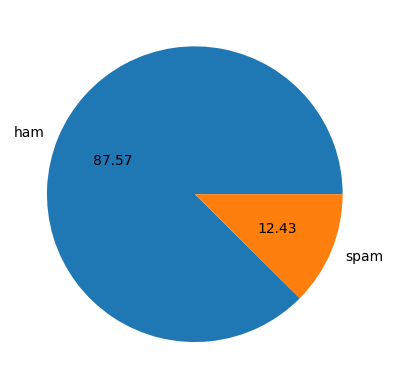

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
import nltk

In [ ]:
!pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
import seaborn as sns

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [ ]:
import re

def extract_hyperlinks(text):

    pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'


    hyperlinks = re.findall(pattern, text)


    for link in hyperlinks:
        text = text.replace(link, f"'{link}'")

    return text

In [ ]:
import nltk
nltk.download('stopwords')
print(transform_text("I loved the lectures on Machine Learning. How about you?"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


love lectur machin learn


In [ ]:
print(transform_text('I loved the lectures on Machine Learning. How about you?'))

love lectur machin learn


In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string

In [ ]:
string.punctuation
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
df['transMessage'] = df['Message'].apply(transform_text)

In [ ]:
df.head()

,Category,Message,transMessage
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [ ]:
X=cv.fit_transform(df['transMessage']).toarray()

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape
Y = df['Category'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=2)

In [ ]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Initialize the classifier
knnc = KNeighborsClassifier(n_neighbors=1)

# Measure the training time
start_time = time.time()
knnc.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure the testing time
start_time = time.time()
predictions = knnc.predict(X_test)
testing_time = time.time() - start_time

# Calculate and print metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')
conf_matrix = confusion_matrix(y_test, predictions)

print('Accuracy of KNN:', accuracy)
print('Precision of KNN:', precision)
print('Recall of KNN:', recall)
print('F1 Score of KNN:', f1)
print('Confusion Matrix:')
print(conf_matrix)
print('Training Time:', training_time, 'seconds')
print('Testing Time:', testing_time, 'seconds')


Accuracy of KNN: 0.9437984496124031
Precision of KNN: 0.9471833820345015
Recall of KNN: 0.9437984496124031
F1 Score of KNN: 0.9363554221051004
Confusion Matrix:
[[905   0]
 [ 58  69]]
Training Time: 0.002409219741821289 seconds
Testing Time: 2.148238182067871 seconds


In [ ]:
import time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Create an SVM classifier with a specified random state for reproducibility
svm_classifier = SVC(random_state=1)

# Measure the training time
start_time = time.time()
svm_classifier.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure the testing time
start_time = time.time()
predictions = svm_classifier.predict(X_test)
testing_time = time.time() - start_time

# Calculate and print metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')
conf_matrix = confusion_matrix(y_test, predictions)

print('Accuracy of SVM:', accuracy)
print('Precision of SVM:', precision)
print('Recall of SVM:', recall)
print('F1 Score of SVM:', f1)
print('Confusion Matrix:')
print(conf_matrix)
print('Training Time:', training_time, 'seconds')
print('Testing Time:', testing_time, 'seconds')


Accuracy of SVM: 0.9689922480620154
Precision of SVM: 0.969656370209207
Recall of SVM: 0.9689922480620154
F1 Score of SVM: 0.9671686166883334
Confusion Matrix:
[[904   1]
 [ 31  96]]
Training Time: 55.46367430686951 seconds
Testing Time: 20.675695657730103 seconds


In [ ]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Create a Decision Tree classifier with a specified random state and max depth
clf = DecisionTreeClassifier(random_state=1, max_depth=40)

# Measure the training time
start_time = time.time()
clf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure the testing time
start_time = time.time()
pred = clf.predict(X_test)
testing_time = time.time() - start_time

# Calculate and print metrics
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1 = f1_score(y_test, pred, average='weighted')
conf_matrix = confusion_matrix(y_test, pred)

print('Accuracy of Decision Tree:', accuracy)
print('Precision of Decision Tree:', precision)
print('Recall of Decision Tree:', recall)
print('F1 Score of Decision Tree:', f1)
print('Confusion Matrix:')
print(conf_matrix)
print('Training Time:', training_time, 'seconds')
print('Testing Time:', testing_time, 'seconds')


Accuracy of Decision Tree: 0.9593023255813954
Precision of Decision Tree: 0.9579594917673597
Recall of Decision Tree: 0.9593023255813954
F1 Score of Decision Tree: 0.957785500389389
Confusion Matrix:
[[894  11]
 [ 31  96]]
Training Time: 15.438085556030273 seconds
Testing Time: 0.02448582649230957 seconds


In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
import time
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the base classifiers
base_classifiers = [
    ('svm', SVC(kernel='linear', random_state=40, probability=True)),  # SVM with linear kernel
    ('knn', KNeighborsClassifier(n_neighbors=1))
]

# Define the meta-classifier
meta_classifier = KNeighborsClassifier(n_neighbors=1)

# Define the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)

# Measure the training time
start_time = time.time()
stacking_classifier.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure the testing time
start_time = time.time()
pred = stacking_classifier.predict(X_test)
testing_time = time.time() - start_time

# Calculate and print metrics
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1 = f1_score(y_test, pred, average='weighted')
conf_matrix = confusion_matrix(y_test, pred)

print('Stacking Classifier Accuracy:', accuracy)
print('Stacking Classifier Precision:', precision)
print('Stacking Classifier Recall:', recall)
print('Stacking Classifier F1 Score:', f1)
print('Confusion Matrix:')
print(conf_matrix)
print('Training Time:', training_time, 'seconds')
print('Testing Time:', testing_time, 'seconds')


Stacking Classifier Accuracy: 0.9660852713178295
Stacking Classifier Precision: 0.9662033136533581
Stacking Classifier Recall: 0.9660852713178295
Stacking Classifier F1 Score: 0.9661423968973091
Confusion Matrix:
[[887  18]
 [ 17 110]]
Training Time: 379.86918473243713 seconds
Testing Time: 5.019137144088745 seconds


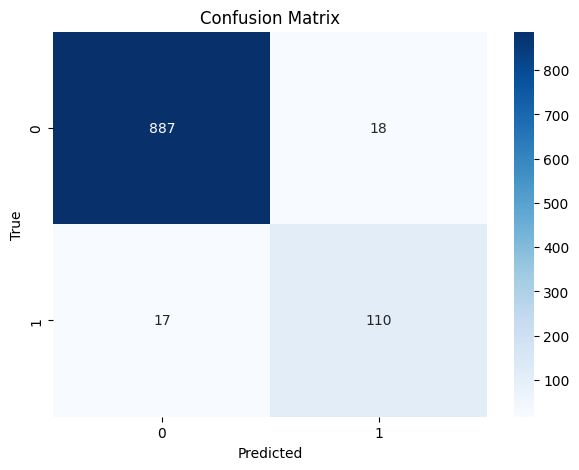

In [ ]:
# Plot the colorful confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=stacking_classifier.classes_, yticklabels=stacking_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import time
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Step 2: Build base classifiers
svm_classifier = SVC(kernel='linear', random_state=42, probability=True)  # Using a linear kernel for simplicity
start_time = time.time()
svm_classifier.fit(X_train, y_train)
training_time_svm = time.time() - start_time

knn_classifier = KNeighborsClassifier(n_neighbors=50)
start_time = time.time()
knn_classifier.fit(X_train, y_train)
training_time_knn = time.time() - start_time

# Step 3: Create a meta-classifier (MLP ANN)
# Concatenate predictions of base classifiers with original features
svm_pred_train = svm_classifier.predict(X_train).reshape(-1, 1)
knn_pred_train = knn_classifier.predict(X_train).reshape(-1, 1)
X_train_meta = np.concatenate((X_train, svm_pred_train, knn_pred_train), axis=1)

# Train MLP on concatenated feature set
mlp_classifier = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
start_time = time.time()
mlp_classifier.fit(X_train_meta, y_train)
training_time_mlp = time.time() - start_time

# Step 4: Stacking
# Concatenate predictions of base classifiers with original features for testing data
svm_pred_test = svm_classifier.predict(X_test).reshape(-1, 1)
knn_pred_test = knn_classifier.predict(X_test).reshape(-1, 1)
X_test_meta = np.concatenate((X_test, svm_pred_test, knn_pred_test), axis=1)

# Use trained MLP to make predictions on concatenated feature set of testing data
start_time = time.time()
y_pred_test = mlp_classifier.predict(X_test_meta)
testing_time = time.time() - start_time

# Step 5: Evaluate performance
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Training Time (SVM):", training_time_svm, "seconds")
print("Training Time (KNN):", training_time_knn, "seconds")
print("Training Time (MLP):", training_time_mlp, "seconds")
print("Testing Time:", testing_time, "seconds")


Accuracy: 0.9825581395348837
Precision: 0.9828982841593389
Recall: 0.9825581395348837
F1 Score: 0.9819788573316233
Training Time (SVM): 71.78682518005371 seconds
Training Time (KNN): 0.0010576248168945312 seconds
Training Time (MLP): 36.0656304359436 seconds
Testing Time: 0.08770227432250977 seconds


In [ ]:
import time
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Initialize the Voting Classifier
vc = VotingClassifier(estimators=[('svm', svm_classifier), ('knn', knn_classifier)], voting='hard')

# Measure the training time
start_time = time.time()
vc.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure the testing time
start_time = time.time()
pvc = vc.predict(X_test)
testing_time = time.time() - start_time

# Calculate and print metrics
accuracy = accuracy_score(y_test, pvc)
precision = precision_score(y_test, pvc, average='weighted', zero_division=0)
recall = recall_score(y_test, pvc, average='weighted', zero_division=0)
f1 = f1_score(y_test, pvc, average='weighted', zero_division=0)
conf_matrix = confusion_matrix(y_test, pvc)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Confusion Matrix:')
print(conf_matrix)
print('Training Time:', training_time, 'seconds')
print('Testing Time:', testing_time, 'seconds')


Accuracy: 0.876937984496124
Precision: 0.7690202286521243
Recall: 0.876937984496124
F1 Score: 0.8194412761682934
Confusion Matrix:
[[905   0]
 [127   0]]
Training Time: 72.5832085609436 seconds
Testing Time: 4.546085357666016 seconds


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier()

# Fit models on training data
knn_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Predict classes for test data
knn_pred_proba = knn_model.predict_proba(X_test)
dt_pred_proba = dt_model.predict_proba(X_test)

# Get class labels with highest probability using argmax
knn_pred = np.argmax(knn_pred_proba, axis=1)
dt_pred = np.argmax(dt_pred_proba, axis=1)

# Print predicted class labels
print("KNN Predictions:", knn_pred)
print("DT Predictions:", dt_pred)

KNN Predictions: [0 0 0 ... 0 0 0]
DT Predictions: [0 0 0 ... 0 0 0]


OTHER CLASSIFIERS

In [ ]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=10000)

# Measure the training time
start_time = time.time()
logreg.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure the testing time
start_time = time.time()
y_pred = logreg.predict(X_test)
testing_time = time.time() - start_time

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy of Logistic Regression:', accuracy)
print('Precision of Logistic Regression:', precision)
print('Recall of Logistic Regression:', recall)
print('F1 Score of Logistic Regression:', f1)
print('Training Time:', training_time, 'seconds')
print('Testing Time:', testing_time, 'seconds')


Accuracy of Logistic Regression: 0.9806201550387597
Precision of Logistic Regression: 0.9806438132701294
Recall of Logistic Regression: 0.9806201550387597
F1 Score of Logistic Regression: 0.9800536378997968
Training Time: 2.226278066635132 seconds
Testing Time: 0.05401778221130371 seconds


In [ ]:
import time
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Voting Classifier
vc = VotingClassifier(estimators=[('Logistic', logreg), ('knn', knnc)], voting='soft')

# Measure the training time
start_time = time.time()
vc.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure the testing time
start_time = time.time()
pvc = vc.predict(X_test)
testing_time = time.time() - start_time

# Calculate and print metrics
accuracy = accuracy_score(y_test, pvc)
precision = precision_score(y_test, pvc, average='weighted')
recall = recall_score(y_test, pvc, average='weighted')
f1 = f1_score(y_test, pvc, average='weighted')

print('Accuracy of KNN + Logistic Regression:', accuracy)
print('Precision of KNN + Logistic Regression:', precision)
print('Recall of KNN + Logistic Regression:', recall)
print('F1 Score of KNN + Logistic Regression:', f1)
print('Training Time:', training_time, 'seconds')
print('Testing Time:', testing_time, 'seconds')


Accuracy of KNN + Logistic Regression: 0.9437984496124031
Precision of KNN + Logistic Regression: 0.9471833820345015
Recall of KNN + Logistic Regression: 0.9437984496124031
F1 Score of KNN + Logistic Regression: 0.9363554221051004
Training Time: 2.0217127799987793 seconds
Testing Time: 2.134148120880127 seconds


In [ ]:
import time
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Voting Classifier
vc = VotingClassifier(estimators=[('Logistic', logreg), ('MLP', mlp_classifier)], voting='soft')

# Measure the training time
start_time = time.time()
vc.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure the testing time
start_time = time.time()
pvc = vc.predict(X_test)
testing_time = time.time() - start_time

# Calculate and print metrics
accuracy = accuracy_score(y_test, pvc)
precision = precision_score(y_test, pvc, average='weighted')
recall = recall_score(y_test, pvc, average='weighted')
f1 = f1_score(y_test, pvc, average='weighted')

print('Accuracy of Logistic + MLP:', accuracy)
print('Precision of Logistic + MLP:', precision)
print('Recall of Logistic + MLP:', recall)
print('F1 Score of Logistic + MLP:', f1)
print('Training Time:', training_time, 'seconds')
print('Testing Time:', testing_time, 'seconds')


Accuracy of Logistic + MLP: 0.9815891472868217
Precision of Logistic + MLP: 0.9817609900651065
Recall of Logistic + MLP: 0.9815891472868217
F1 Score of Logistic + MLP: 0.9810144977508676
Training Time: 40.868143796920776 seconds
Testing Time: 0.089111328125 seconds


In [ ]:
import time
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Voting Classifier
vc = VotingClassifier(estimators=[('Decision Tree', clf), ('MLP', mlp_classifier)], voting='soft')

# Measure the training time
start_time = time.time()
vc.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure the testing time
start_time = time.time()
pvc = vc.predict(X_test)
testing_time = time.time() - start_time

# Calculate and print metrics
accuracy = accuracy_score(y_test, pvc)
precision = precision_score(y_test, pvc, average='weighted')
recall = recall_score(y_test, pvc, average='weighted')
f1 = f1_score(y_test, pvc, average='weighted')

print('Accuracy of Decision Tree + MLP:', accuracy)
print('Precision of Decision Tree + MLP:', precision)
print('Recall of Decision Tree + MLP:', recall)
print('F1 Score of Decision Tree + MLP:', f1)
print('Training Time:', training_time, 'seconds')
print('Testing Time:', testing_time, 'seconds')


Accuracy of Decision Tree + MLP: 0.9622093023255814
Precision of Decision Tree + MLP: 0.9610622761438732
Recall of Decision Tree + MLP: 0.9622093023255814
F1 Score of Decision Tree + MLP: 0.9610297585412544
Training Time: 47.38499402999878 seconds
Testing Time: 0.07550358772277832 seconds


In [ ]:
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Measure the training time
start_time = time.time()
nb_classifier.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure the testing time
start_time = time.time()
y_pred = nb_classifier.predict(X_test)
testing_time = time.time() - start_time

# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy of Naive Bayes:', accuracy)
print('Precision of Naive Bayes:', precision)
print('Recall of Naive Bayes:', recall)
print('F1 Score of Naive Bayes:', f1)
print('Training Time:', training_time, 'seconds')
print('Testing Time:', testing_time, 'seconds')


Accuracy of Naive Bayes: 0.8691860465116279
Precision of Naive Bayes: 0.9188337611481913
Recall of Naive Bayes: 0.8691860465116279
F1 Score of Naive Bayes: 0.8841103245565198
Training Time: 0.5256686210632324 seconds
Testing Time: 0.1206507682800293 seconds


In [ ]:
import time
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Voting Classifier
vc = VotingClassifier(estimators=[('Decision Tree', clf), ('Naive_bayes', nb_classifier)], voting='soft')

# Measure the training time
start_time = time.time()
vc.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure the testing time
start_time = time.time()
pvc = vc.predict(X_test)
testing_time = time.time() - start_time

# Calculate and print metrics
accuracy = accuracy_score(y_test, pvc)
precision = precision_score(y_test, pvc, average='weighted')
recall = recall_score(y_test, pvc, average='weighted')
f1 = f1_score(y_test, pvc, average='weighted')

print('Accuracy of Naive Bayes + Decision Tree:', accuracy)
print('Precision of Naive Bayes + Decision Tree:', precision)
print('Recall of Naive Bayes + Decision Tree:', recall)
print('F1 Score of Naive Bayes + Decision Tree:', f1)
print('Training Time:', training_time, 'seconds')
print('Testing Time:', testing_time, 'seconds')


Accuracy of Naive Bayes + Decision Tree: 0.874031007751938
Precision of Naive Bayes + Decision Tree: 0.9120128539026918
Recall of Naive Bayes + Decision Tree: 0.874031007751938
F1 Score of Naive Bayes + Decision Tree: 0.8864133764509248
Training Time: 9.507006645202637 seconds
Testing Time: 0.10794544219970703 seconds


In [ ]:
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier()

# Measure the training time
start_time = time.time()
xgb_classifier.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure the testing time
start_time = time.time()
y_pred = xgb_classifier.predict(X_test)
testing_time = time.time() - start_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Training Time:", training_time, "seconds")
print("Testing Time:", testing_time, "seconds")


Accuracy: 0.9767441860465116
Precision: 0.976522162644426
Recall: 0.9767441860465116
F1 Score: 0.9760643654797562
Training Time: 6.232659339904785 seconds
Testing Time: 0.036539554595947266 seconds


In [ ]:
import time
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming X_train, X_test, y_train, y_test are defined previously

# Base estimators
estimators = [
    ('decision_tree', DecisionTreeClassifier(max_depth=5)),
    ('xgboost', XGBClassifier())
]

# Stacking classifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=DecisionTreeClassifier())

# Measure the training time
start_time = time.time()
stacking_clf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure the testing time
start_time = time.time()
y_pred = stacking_clf.predict(X_test)
testing_time = time.time() - start_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Accuracy of Stacking Classifier:", accuracy)
print("Precision of Stacking Classifier:", precision)
print("Recall of Stacking Classifier:", recall)
print("F1 Score of Stacking Classifier:", f1)
print("Training Time:", training_time, "seconds")
print("Testing Time:", testing_time, "seconds")


Accuracy of Stacking Classifier: 0.9622093023255814
Precision of Stacking Classifier: 0.9614759706922344
Recall of Stacking Classifier: 0.9622093023255814
F1 Score of Stacking Classifier: 0.9617466010189366
Training Time: 46.810882329940796 seconds
Testing Time: 0.04820847511291504 seconds


In [ ]:
import time
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Base estimators
estimators = [
    ('decision_tree', DecisionTreeClassifier(max_depth=5)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('xgboost', XGBClassifier())
]

# Stacking classifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=DecisionTreeClassifier())

# Measure the training time
start_time = time.time()
stacking_clf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure the testing time
start_time = time.time()
y_pred = stacking_clf.predict(X_test)
testing_time = time.time() - start_time

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("Accuracy of Stacking Classifier:", accuracy)
print("Precision of Stacking Classifier:", precision)
print("Recall of Stacking Classifier:", recall)
print("F1 Score of Stacking Classifier:", f1)
print("Training Time:", training_time, "seconds")
print("Testing Time:", testing_time, "seconds")


Accuracy of Stacking Classifier: 0.9631782945736435
Precision of Stacking Classifier: 0.9625499101639904
Recall of Stacking Classifier: 0.9631782945736435
F1 Score of Stacking Classifier: 0.9627936995262031
Training Time: 52.944122314453125 seconds
Testing Time: 2.08878231048584 seconds


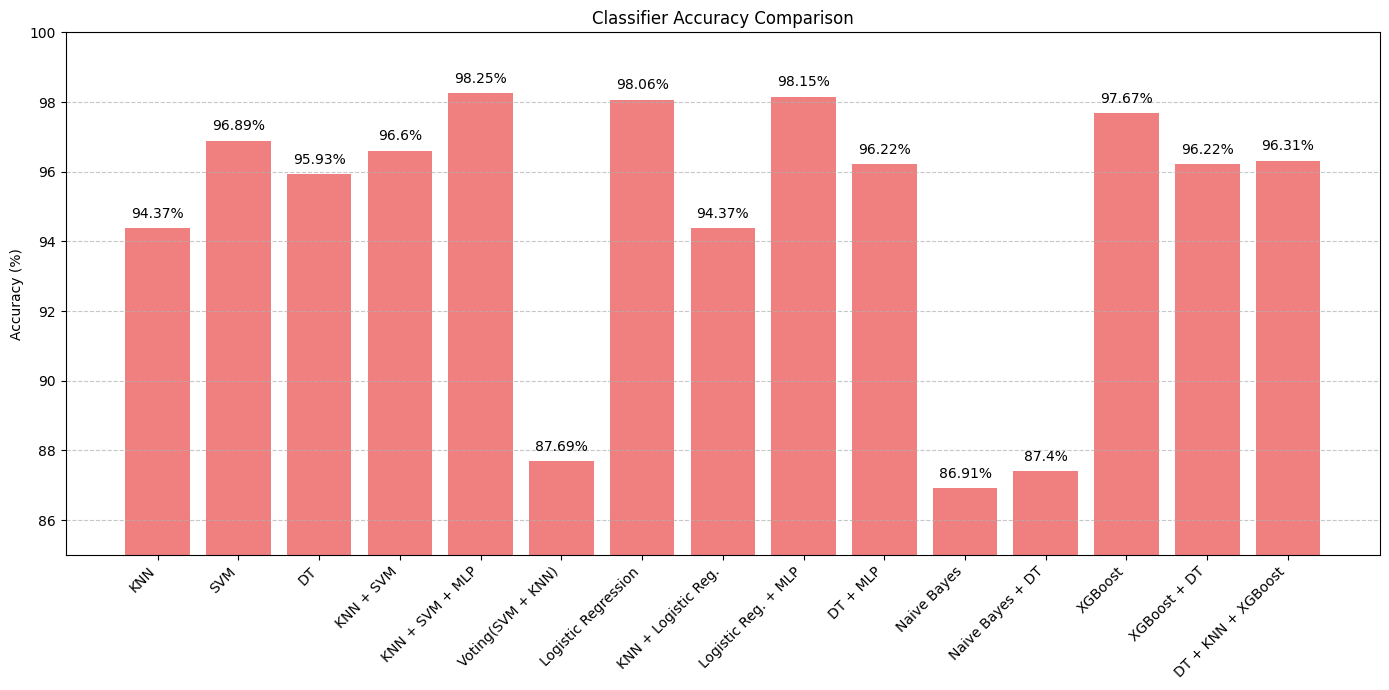

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt

# Data
classifiers = [
    'KNN', 'SVM', 'DT', 'KNN + SVM', 'KNN + SVM + MLP', 'Voting(SVM + KNN)',
    'Logistic Regression', 'KNN + Logistic Reg.', 'Logistic Reg. + MLP',
    'DT + MLP', 'Naive Bayes', 'Naive Bayes + DT', 'XGBoost', 'XGBoost + DT',
    'DT + KNN + XGBoost'
]

accuracies = [
    94.37, 96.89, 95.93, 96.60, 98.25, 87.69, 98.06, 94.37, 98.15, 96.22,
    86.91, 87.40, 97.67, 96.22, 96.31
]

# Plot
plt.figure(figsize=(14, 7))
bars = plt.bar(classifiers, accuracies, color='lightcoral')
plt.ylabel('Accuracy (%)')
plt.title('Classifier Accuracy Comparison')
plt.ylim(85, 100)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate accuracy values on top of each bar
for bar, accuracy in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f'{accuracy}%', ha='center')

plt.show()
